In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
plt.style.use('ggplot')

Carguemos los datos en un dataframe:

In [2]:
tabla=pd.read_csv('ETL.csv')

# 1:
Busquemos la diferencia de tiempos entre semanas:

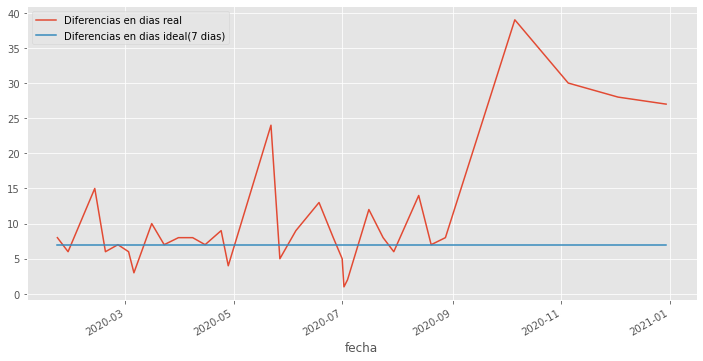

In [3]:
fechas=pd.DataFrame()
fechas['fecha']=pd.Series(pd.to_datetime(tabla['fecha'].value_counts().index)).sort_values()
fechas['diferencias']=fechas['fecha'].diff().astype(str).apply(lambda x: x.split()[0])
fechas.reset_index(drop=True,inplace=True)
fechas.drop(index=[0],inplace=True)
fechas['diferencias']=fechas['diferencias'].astype(int)
fechas.plot.line(x='fecha',y='diferencias',figsize=(12,6))
plt.plot(fechas['fecha'],np.ones(fechas.shape[0])*7)
plt.legend(['Diferencias en dias real','Diferencias en dias ideal(7 dias)'])
plt.show()

In [4]:
tabla['fecha'] = pd.to_datetime(tabla['fecha'])
tabla.query("fecha>'2020-08-30' and fecha<'2020-11-01'").shape

(825, 17)

825 registros en este periodo de tiempo equivalen a 25 pollos registrados a lo largo de dos meses.

# 2:

Ahora miremos la distribucion de edades de los pollos:

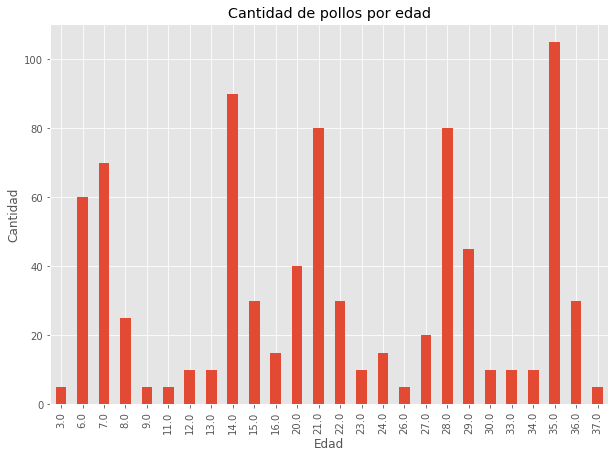

In [5]:
(tabla['edadEnDias'].value_counts()/33).sort_index().plot.bar(figsize=(10,7))
plt.title('Cantidad de pollos por edad')
plt.ylabel('Cantidad')
plt.xlabel('Edad')
plt.show()

De aca se puede saber que a los pollos los registran mas o menos cuando su edad es un multiple de 7. ¿Esta distribucion cumple con lo esperado?

# 3:

Determinemos cuales son las 10 lesiones que mas presentan los pollos:

#1: - Cardiovascular / Rango:0-3
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      249 |        95.4  |
|  1 |                2 |        9 |         3.45 |
|  2 |                3 |        1 |         0.38 |
|  3 |                4 |        1 |         0.38 |
|  4 |                6 |        1 |         0.38 |
+----+------------------+----------+--------------+


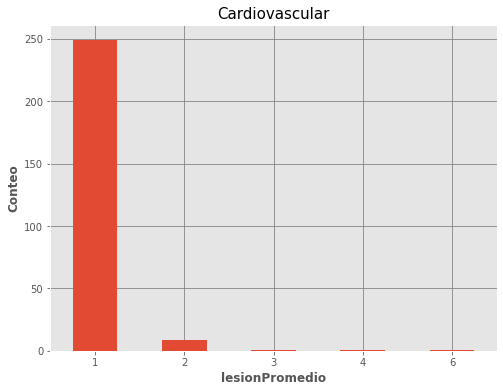

-----------------------------------------------------------


#2: - ErosionMolleja / Rango:0-3
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      181 |        70.16 |
|  1 |                2 |       62 |        24.03 |
|  2 |                3 |       14 |         5.43 |
|  3 |                4 |        1 |         0.39 |
+----+------------------+----------+--------------+


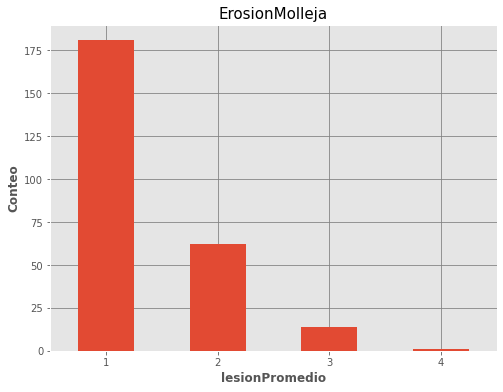

-----------------------------------------------------------


#3: - PasajeAlimento / Rango:0-2
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      238 |        96.75 |
|  1 |                2 |        6 |         2.44 |
|  2 |                3 |        1 |         0.41 |
|  3 |                5 |        1 |         0.41 |
+----+------------------+----------+--------------+


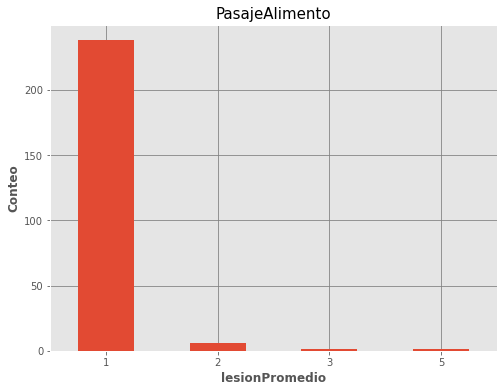

-----------------------------------------------------------


#4: - ExcesoMocoIntestinal / Rango:0-2
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      197 |        97.52 |
|  1 |                2 |        5 |         2.48 |
+----+------------------+----------+--------------+


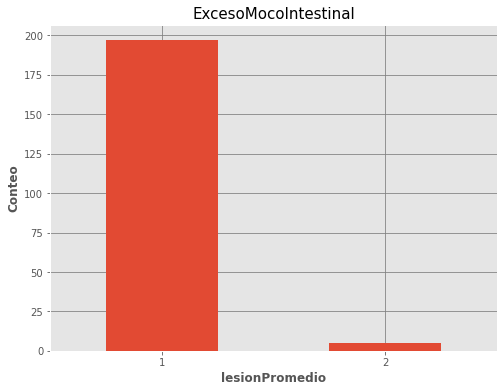

-----------------------------------------------------------


#5: - RetencionSacoVitelino / Rango:0-1
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      176 |        98.32 |
|  1 |                2 |        3 |         1.68 |
+----+------------------+----------+--------------+


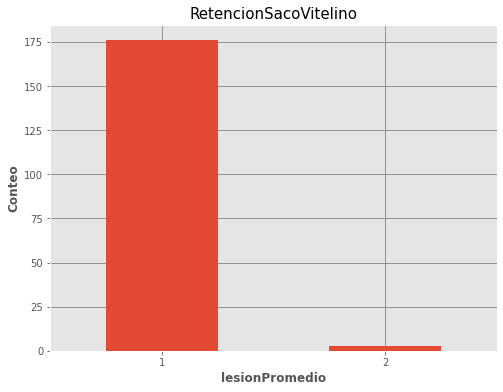

-----------------------------------------------------------


#6: - HemorragiasPetequiales / Rango:0-1
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      173 |          100 |
+----+------------------+----------+--------------+


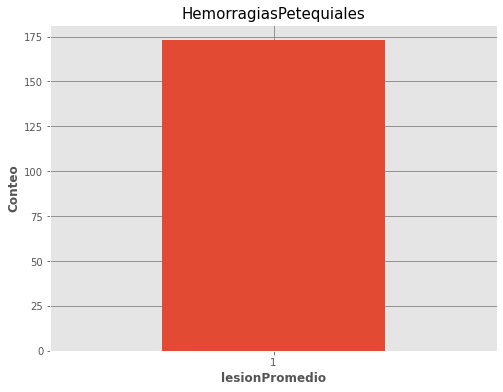

-----------------------------------------------------------


#7: - Traqueitis / Rango:0-3
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      141 |        89.24 |
|  1 |                2 |       14 |         8.86 |
|  2 |                3 |        3 |         1.9  |
+----+------------------+----------+--------------+


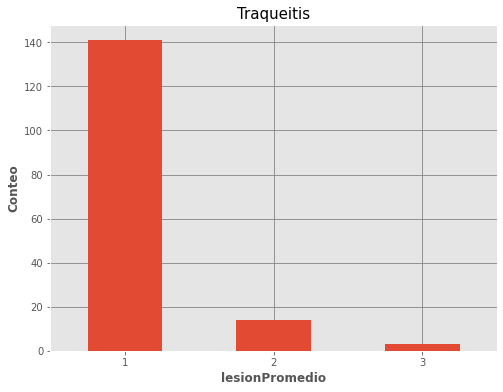

-----------------------------------------------------------


#8: - Aerosaculitis / Rango:0-4
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      102 |        65.38 |
|  1 |                2 |       24 |        15.38 |
|  2 |                3 |       23 |        14.74 |
|  3 |                4 |        7 |         4.49 |
+----+------------------+----------+--------------+


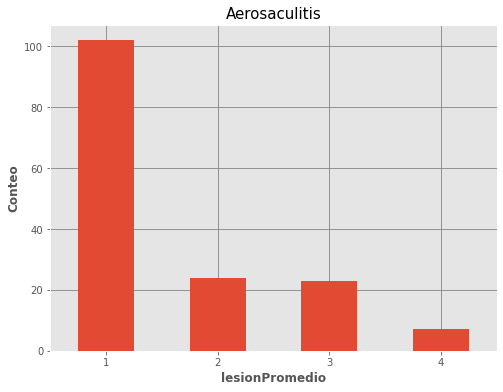

-----------------------------------------------------------


#9: - E.maxima / Rango:0-4
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      113 |        89.68 |
|  1 |                2 |       12 |         9.52 |
|  2 |                5 |        1 |         0.79 |
+----+------------------+----------+--------------+


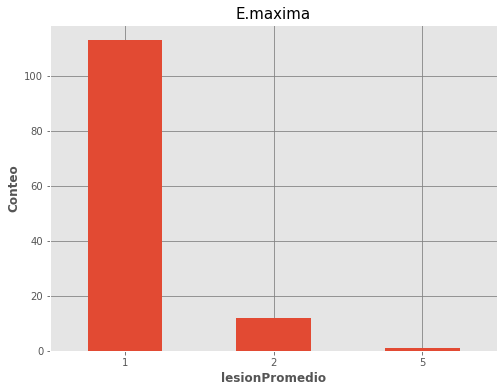

-----------------------------------------------------------


#10: - GasCecal / Rango:0-2
+----+------------------+----------+--------------+
|    |   lesionPromedio |   conteo |   porcentaje |
|----+------------------+----------+--------------|
|  0 |                1 |      115 |        93.5  |
|  1 |                2 |        6 |         4.88 |
|  2 |                3 |        1 |         0.81 |
|  3 |                5 |        1 |         0.81 |
+----+------------------+----------+--------------+


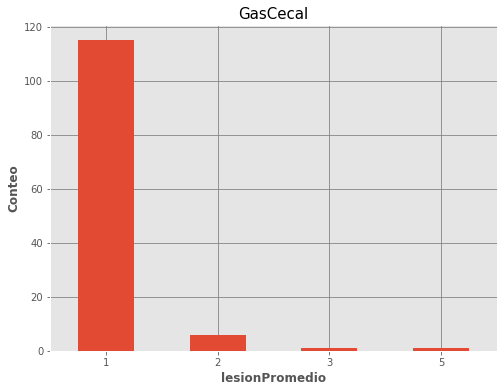

-----------------------------------------------------------




In [6]:
rangos=dict(tabla.iloc[:33,[0,2]].values)
datos=tabla.query("lesionPromedio!=0").groupby('lesionTipo')['lesionPromedio'].value_counts()
orden=datos.sum(level='lesionTipo').sort_values(ascending=False).index
for i,lesion in enumerate(orden[:10]):
    print(f"#{i+1}: - {lesion} / Rango:{rangos[lesion]}")
    resultados=datos.loc[lesion].reset_index(name=lesion)
    resultados['porcentaje']=(100*resultados[lesion]/resultados[lesion].sum()).round(2)
    print(tabulate(resultados.rename(columns={lesion:'conteo'}), headers='keys', tablefmt='psql'))
    resultados.plot.bar(x='lesionPromedio',y=lesion,figsize=(8,6),fontsize=10)
    plt.title(lesion,size=15)
    plt.xticks(rotation=0)
    plt.xlabel('lesionPromedio',size=12,weight=800)
    plt.ylabel("Conteo",size=12,weight=800)
    plt.legend().remove()
    plt.grid(color='gray')
    plt.show()
    print("-----------------------------------------------------------\n\n")

Hay varias enfermedades que estan presentes en una cuarta parte de los pollos ¿Esto es de cuidado o es normal?

# 4:

Visualicemos por ultimo las 4 variables que se plantearon como de interes:

In [7]:
def mostrar_atributo(atributo):
    if atributo=='sexoAnimales':
        resultado=tabla[atributo].replace(
        {
            'M ':'M',
            'Macho':'M',
            'Mac':'M',
            'Hem':'H',
            'Hembra':'H',
        },inplace=True)
        
    resultado=(tabla[atributo].value_counts()/33).reset_index()\
                                .rename(columns={'index':atributo,atributo:'conteo'})
    resultado['porcentaje']=(100*resultado['conteo']/resultado['conteo'].sum()).round(2)
    print(tabulate(resultado, headers='keys', tablefmt='psql'))

    resultado.plot.bar(x=atributo,y='conteo',figsize=(8,6))
    plt.xticks(rotation=0)
    plt.xlabel(atributo,size=12,weight=800)
    plt.ylabel("Conteo",size=12,weight=800)
    plt.legend().remove()
    plt.show()

+----+----------------+----------+--------------+
|    | sexoAnimales   |   conteo |   porcentaje |
|----+----------------+----------+--------------|
|  0 | -              |      372 |        45.09 |
|  1 | M              |      242 |        29.33 |
|  2 | H              |      207 |        25.09 |
|  3 | S              |        2 |         0.24 |
|  4 | J              |        2 |         0.24 |
+----+----------------+----------+--------------+


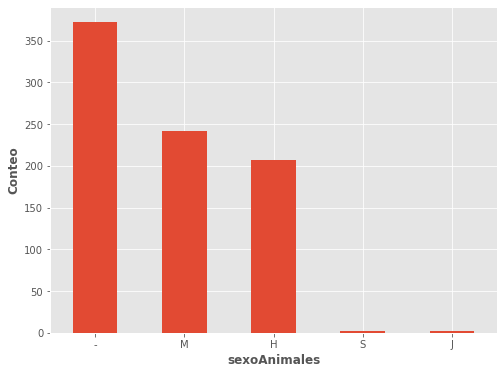


+----+--------------+----------+--------------+
|    |   bursometro |   conteo |   porcentaje |
|----+--------------+----------+--------------|
|  0 |            0 |      375 |        45.45 |
|  1 |            4 |      112 |        13.58 |
|  2 |            5 |      108 |        13.09 |
|  3 |            6 |       75 |         9.09 |
|  4 |            3 |       71 |         8.61 |
|  5 |            7 |       63 |         7.64 |
|  6 |            8 |       14 |         1.7  |
|  7 |            2 |        3 |         0.36 |
|  8 |           -1 |        2 |         0.24 |
|  9 |            9 |        1 |         0.12 |
| 10 |            1 |        1 |         0.12 |
+----+--------------+----------+--------------+


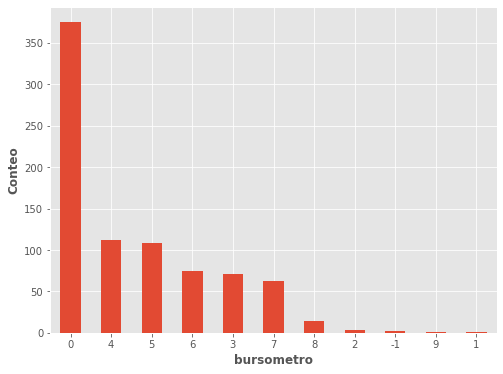


+----+-------------------+----------+--------------+
|    | condicionHigado   |   conteo |   porcentaje |
|----+-------------------+----------+--------------|
|  0 | -                 |      563 |        68.24 |
|  1 | TX                |      142 |        17.21 |
|  2 | T                 |       54 |         6.55 |
|  3 | TX-C              |       33 |         4    |
|  4 | TX-C-T            |       13 |         1.58 |
|  5 | C                 |        6 |         0.73 |
|  6 | C-T               |        6 |         0.73 |
|  7 | TX-T              |        5 |         0.61 |
|  8 | T                 |        2 |         0.24 |
|  9 | T-C               |        1 |         0.12 |
+----+-------------------+----------+--------------+


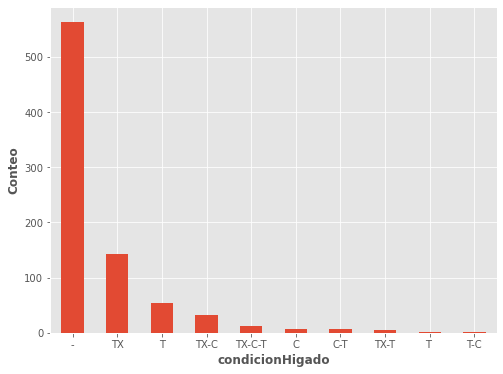


+----+------------------------+----------+--------------+
|    |   integridadIntestinal |   conteo |   porcentaje |
|----+------------------------+----------+--------------|
|  0 |                      0 |      372 |        45.09 |
|  1 |                      8 |      180 |        21.82 |
|  2 |                      9 |      156 |        18.91 |
|  3 |                     10 |       66 |         8    |
|  4 |                      7 |       48 |         5.82 |
|  5 |                      6 |        2 |         0.24 |
|  6 |                      5 |        1 |         0.12 |
+----+------------------------+----------+--------------+


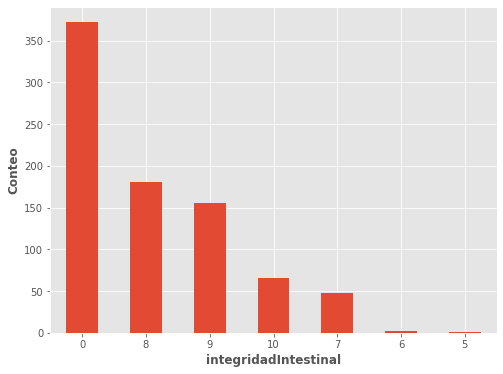

In [8]:
mostrar_atributo('sexoAnimales')
print()
mostrar_atributo('bursometro')
print()
mostrar_atributo('condicionHigado')
print()
mostrar_atributo('integridadIntestinal')